In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passi

In [2]:
import os
os.getcwd()
#os.chdir('/Users/saketh/Documents/darkflow-master')

'/Users/saketh/Documents/darkflow-master'

In [ ]:
%%time
options = {"model": "cfg/yolo-voc-1c.cfg", 
           "load": "weights/tiny-yolo-voc.weights",
           "batch": 4,
           "gpu": 1.0,
           "epoch": 300,
           "train": True,
           "annotation": "new_data/labels",
           "dataset": "new_data/images"}

In [ ]:
from darkflow.net.build import TFNet
tfnet = TFNet(options)

In [ ]:
%%time
tfnet.train()

In [ ]:
"model": "cfg/yolo-voc-1c.cfg", 
           "load": "weights/tiny-yolo-voc.weights",
           "batch": 4,
           "gpu": 1.0,
           "epoch": 300,
           "train": True,
           "annotation": "new_data/labels",
           "dataset": "new_data/images"

In [3]:
options = {
 'model': 'cfg/yolo-voc-1c.cfg',
 'load': 24000,
 'gpu':1.0,
 'train':True,
 'threshold': 0.1,
 'backup':'ckpt/',
 "annotation": "new_data/labels",
 "dataset": "new_data/images",
 "batch":4,
 "epoch":100
 
}
tfnet2 = TFNet(options)

Parsing cfg/yolo-voc-1c.cfg
Loading None ...
Finished in 0.00013184547424316406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 

In [4]:
tfnet2.load_from_ckpt()

Loading from ckpt/yolo-voc-1c-24000
INFO:tensorflow:Restoring parameters from ckpt/yolo-voc-1c-24000


In [ ]:
#tfnet2.train()

In [77]:
# read the color image and covert to RGB
import cv2

img = cv2.imread('new_data/images/licensed_car15.jpeg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
result = tfnet2.return_predict(img)

img.shape

(642, 774, 3)

In [78]:
result

[{'label': 'plate',
  'confidence': 0.8210851,
  'topleft': {'x': 262, 'y': 342},
  'bottomright': {'x': 525, 'y': 429}}]

In [79]:
import cv2
import pytesseract
import numpy as np

In [80]:


def my_function(image):
    
    # USAGE
    # python correct_skew.py --image images/neg_28.png
    
    # import the necessary packages
    import numpy as np
    #import argparse
    import cv2
    
    # construct the argument parse and parse the arguments
    """ap = argparse.ArgumentParser()
    ap.add_argument("-i", "--image", required=True,
        help="path to input image file")
    args = vars(ap.parse_args())"""
    
    # load the image from disk
    #image = cv2.imread(img)
    
    # convert the image to grayscale and flip the foreground
    # and background to ensure foreground is now "white" and
    # the background is "black"
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    
    # threshold the image, setting all foreground pixels to
    # 255 and all background pixels to 0
    thresh = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    # grab the (x, y) coordinates of all pixel values that
    # are greater than zero, then use these coordinates to
    # compute a rotated bounding box that contains all
    # coordinates
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    
    # the `cv2.minAreaRect` function returns values in the
    # range [-90, 0); as the rectangle rotates clockwise the
    # returned angle trends to 0 -- in this special case we
    # need to add 90 degrees to the angle
    if angle < -45:
        angle = -(90 + angle)
    
    # otherwise, just take the inverse of the angle to make
    # it positive
    else:
        angle = -angle
    
    # rotate the image to deskew it
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),
        flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    # draw the correction angle on the image so we can validate it
    #cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
    #    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    
    # show the output image
    print("[INFO] angle: {:.3f}".format(angle))
    cv2.imshow("Input", image)
    cv2.imshow("Rotated", rotated)
    return rotated
    cv2.waitKey(0)

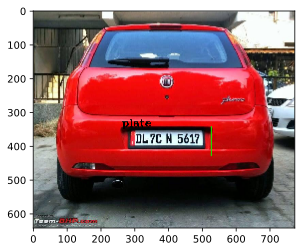

[INFO] angle: -0.000


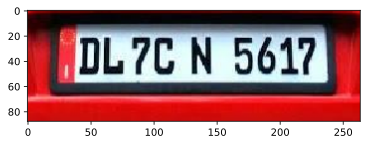

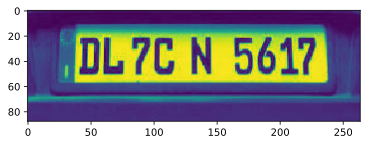

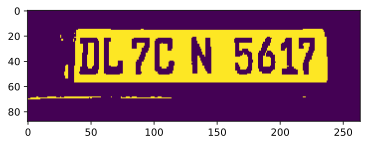

OUTPUT: HDL 70 N 5617 13


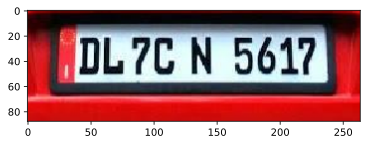

In [81]:
img1=img.copy()
# pull out some info from the results
for i in range(0, len(result)):
    tl = (result[i]['topleft']['x'], result[i]['topleft']['y'])
    br = (result[i]['bottomright']['x'], result[i]['bottomright']['y'])
    label = result[i]['label']
# add the box and label and display it
    img = cv2.rectangle(img, tl, br, (0, 255, 0), 1)
    img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
    plt.imshow(img)
    #image[1:(y2 + 1), 1:(x2 + 1)]
plt.show()

for i in range(0,len(result)):
    tl = (result[i]['topleft']['x'], result[i]['topleft']['y'])
    br = (result[i]['bottomright']['x'], result[i]['bottomright']['y'])
    label = result[i]['label']
    cropped=img1[tl[1]:(br[1] + 1), tl[0]:(br[0] + 1)]
    cropped=my_function(cropped)
    image = cropped
    plt.imshow(image)
    plt.show()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    plt.show()
    gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    plt.imshow(gray)
    plt.show()
    plt.show()
    out_below = pytesseract.image_to_string(gray)
    print("OUTPUT:", out_below,len(out_below))
    plt.imshow(cropped)
    plt.show()

In [7]:
import numpy as np
import time

In [ ]:
capture = cv2.VideoCapture('1.mp4')
colors = [tuple(255 * np.random.rand(3)) for i in range(10)]

In [ ]:
while (capture.isOpened()):
    stime = time.time()
    ret, frame = capture.read()# ret is a boolean. True when the video is playing.
    frame1=frame.copy()
    if ret:
        results = tfnet2.return_predict(frame)
        
        for color, result in zip(colors, results):
            tl = (result['topleft']['x'], result['topleft']['y'])
            br = (result['bottomright']['x'], result['bottomright']['y'])
            label = result['label']
            cropped=frame1[tl[1]:(br[1] + 1), tl[0]:(br[0] + 1)]
            image = cropped
            plt.imshow(image)
            plt.show()
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            plt.imshow(gray)
            plt.show()
            gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
            plt.imshow(gray)
            plt.show()
            plt.show()
            out_below = pytesseract.image_to_string(gray)
            print("OUTPUT:", out_below,len(out_below))
            plt.imshow(cropped)
            plt.show()
        for color, result in zip(colors, results):
            tl = (result['topleft']['x'], result['topleft']['y'])
            br = (result['bottomright']['x'], result['bottomright']['y'])
            label = result['label']
            frame = cv2.rectangle(frame, tl, br, color, 7)
            frame = cv2.putText(frame, label+out_below, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
        cv2.imshow('frame', frame)
        #cv2.imshow('frame', frame)
        print('FPS {:.1f}'.format(1 / (time.time() - stime)))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        capture.release()
        cv2.destroyAllWindows()
        break

In [ ]:
capture.release()
cv2.destroyAllWindows()

Image Recognition

In [ ]:
image = cv2.imread("23.jpeg")
plt.imshow(image)
plt.show()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = cv2.bitwise_not(gray)
plt.imshow(gray)
plt.show()
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(gray)
plt.show()
gray = cv2.medianBlur(gray, 3)
plt.imshow(gray)
plt.show()
out_below = pytesseract.image_to_string(gray)
print("OUTPUT:", out_below)